In [1]:
# ============================================================
# a. Import Required Libraries
# ============================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# ============================================================
# b. Upload / Access Dataset
# ============================================================
data = pd.read_csv("creditcard.csv")
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [3]:
# ============================================================
# Data Preprocessing
# ============================================================
# The dataset has a 'Class' column where 1 = Fraud, 0 = Normal
# We will use only the features (excluding 'Class') for training
X = data.drop('Class', axis=1)
y = data['Class']

In [4]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Split data — use only normal transactions (Class=0) for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_normal = X_train[y_train == 0]
X_test_normal = X_test[y_test == 0]
X_test_fraud = X_test[y_test == 1]

print("Training data (normal):", X_train_normal.shape)
print("Testing normal:", X_test_normal.shape)
print("Testing fraud:", X_test_fraud.shape)

Training data (normal): (227451, 30)
Testing normal: (56864, 30)
Testing fraud: (98, 30)


In [6]:
# ============================================================
# c. Encoder – Converts input to latent representation
# ============================================================
input_dim = X_train_normal.shape[1]
encoding_dim = 14  # latent space dimension

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(7, activation="relu")(encoder)

In [7]:
# ============================================================
# d. Decoder – Reconstructs back to original input
# ============================================================
decoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Combine Encoder + Decoder to form Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [8]:
# ============================================================
# e. Compile Model with Optimizer, Loss, and Metrics
# ============================================================
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [9]:
# ============================================================
# Train the Model
# ============================================================
history = autoencoder.fit(
    X_train_normal, X_train_normal,
    epochs=20,
    batch_size=256,
    validation_data=(X_test_normal, X_test_normal),
    shuffle=True
)

Epoch 1/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9138 - mae: 0.6374 - val_loss: 0.8189 - val_mae: 0.5937
Epoch 2/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8174 - mae: 0.5830 - val_loss: 0.7887 - val_mae: 0.5750
Epoch 3/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7995 - mae: 0.5721 - val_loss: 0.7788 - val_mae: 0.5691
Epoch 4/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7928 - mae: 0.5679 - val_loss: 0.7738 - val_mae: 0.5662
Epoch 5/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7886 - mae: 0.5652 - val_loss: 0.7702 - val_mae: 0.5632
Epoch 6/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7854 - mae: 0.5629 - val_loss: 0.7672 - val_mae: 0.5615
Epoch 7/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7827 - mae: 0.5609 - val_loss: 0.7649 - val_mae: 0.5597
Epoch 8/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7805 - mae: 0.5594 - val_loss: 0.7631 - val_mae: 0.5584
Epoch 9/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - lo

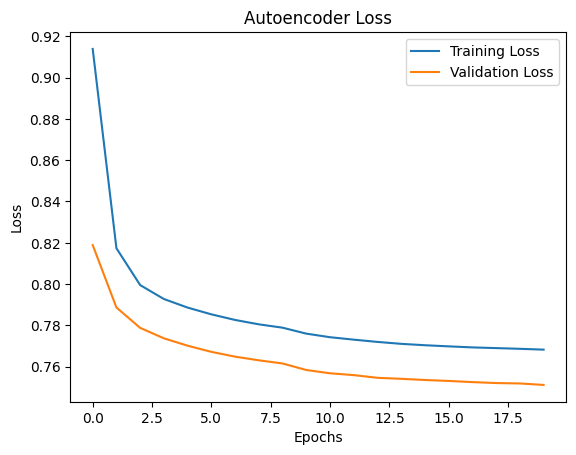

In [10]:
# ============================================================
# Evaluate Model
# ============================================================
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# ============================================================
# Detect Anomalies
# ============================================================
# Compute reconstruction error
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [12]:
# Define threshold for anomaly
threshold = np.percentile(mse, 95)
print("Reconstruction error threshold:", threshold)


Reconstruction error threshold: 1.6041292748790856


In [13]:
# Predict anomalies
y_pred = [1 if e > threshold else 0 for e in mse]


In [14]:
# ============================================================
# Compare with actual labels
# ============================================================
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[54103  2761]
 [   10    88]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962

